In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_vel3d import Parser

In [3]:
# Coastal Endurance Oregon Inshore Surface Mooring MFN (25 meters) VEL3D data
baseurl = "https://rawdata.oceanobservatories.org/files/CE01ISSM/D00003/dcl35/vel3d/"
fname = "20150606_122756.vel3d.log"

# initialize the Parser object for the VEL3D sampling at 8 Hz
vel3d = Parser(baseurl + fname, 8)
r = requests.get(vel3d.infile, verify=True) # use verify=False for expired certificate

In [4]:
vel3d.raw = r.content
len(vel3d.raw), vel3d.raw[:4]

(41490, b'\xa5\x12\x15\x00')

In [5]:
vel3d.parse_header()
vel3d.parse_velocity()
vel3d.data.keys()

dict_keys(['system', 'velocity', 'header'])

In [6]:
vel3d.data.system.time[:5]

[1433593811, 1433593812, 1433593813, 1433593814, 1433593815]

In [7]:
df = pd.DataFrame(vel3d.data.system)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [8]:
df.shape, df.columns

((181, 11),
 Index(['battery_voltage', 'date_time_array', 'error_code', 'heading', 'pitch',
        'roll', 'speed_of_sound', 'status_code', 'temperature', 'time',
        'dt_utc'],
       dtype='object'))

In [9]:
df.dtypes

battery_voltage           float64
date_time_array            object
error_code                  int64
heading                   float64
pitch                     float64
roll                      float64
speed_of_sound            float64
status_code                 int64
temperature               float64
time                        int64
dt_utc             datetime64[ns]
dtype: object

In [10]:
df.tail(5)

battery_voltage           date_time_array  error_code  \
dt_utc                                                                       
2015-06-06 12:33:07             11.5   [2015, 6, 6, 12, 33, 7]           0   
2015-06-06 12:33:08             11.5   [2015, 6, 6, 12, 33, 8]           0   
2015-06-06 12:33:09             11.5   [2015, 6, 6, 12, 33, 9]           0   
2015-06-06 12:33:10             11.5  [2015, 6, 6, 12, 33, 10]           0   
2015-06-06 12:33:11             11.5  [2015, 6, 6, 12, 33, 11]           0   

                     heading  pitch  roll  speed_of_sound  status_code  \
dt_utc                                                                   
2015-06-06 12:33:07     45.3    0.5   0.2          1478.1           83   
2015-06-06 12:33:08     45.7    0.5   0.3          1478.1           83   
2015-06-06 12:33:09     45.4    0.4   0.2          1478.1           83   
2015-06-06 12:33:10     45.4    0.4   0.2          1478.1           83   
2015-06-06 12:33:11     45.6    0.5   0.3          1478.1           83   

                     temperature        time              dt_utc  
dt_utc                                                            
2015-06-06 12:33:07         7.56  1433593987 2015-06-06 12:33:07  
2015-06-06 12:33:08         7.56  1433593988 2015-06-06 12:33:08  
2015-06-06 12:33:09         7.56  1433593989 2015-06-06 12:33:09  
2015-06-06 12:33:10         7.56  1433593990 2015-06-06 12:33:10  
2015-06-06 12:33:11         7.56  1433593991 2015-06-06 12:33:11

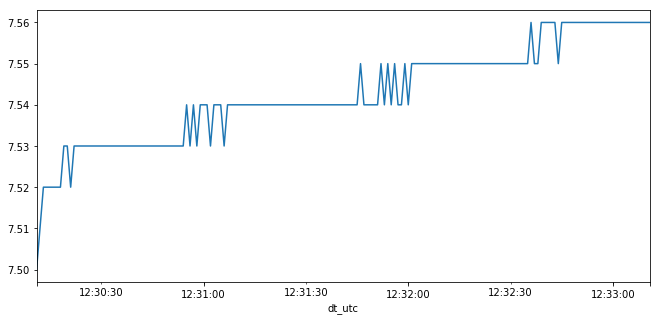

In [11]:
df['temperature'].plot(figsize=(11,5));

In [12]:
df = pd.DataFrame(vel3d.data.velocity)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [13]:
df.shape, df.columns

((1440, 9),
 Index(['amplitudes', 'correlations', 'ensemble_counter', 'pressure', 'time',
        'velocity_east', 'velocity_north', 'velocity_vertical', 'dt_utc'],
       dtype='object'))

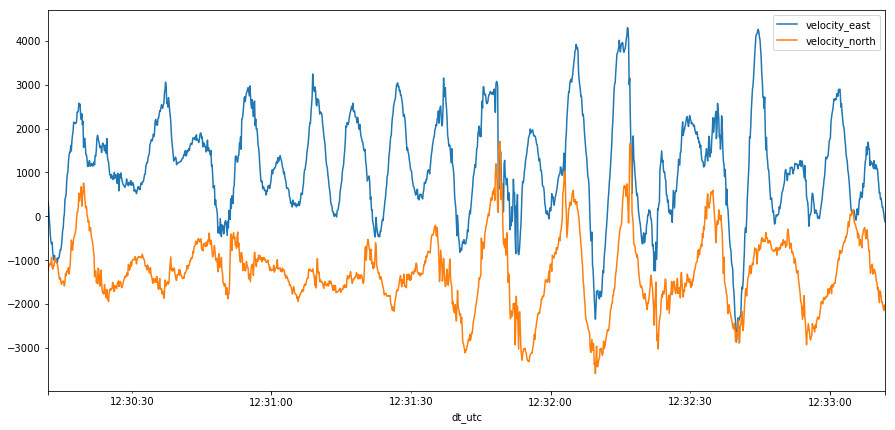

In [14]:
df[['velocity_east', 'velocity_north']].plot(figsize=(15,7));

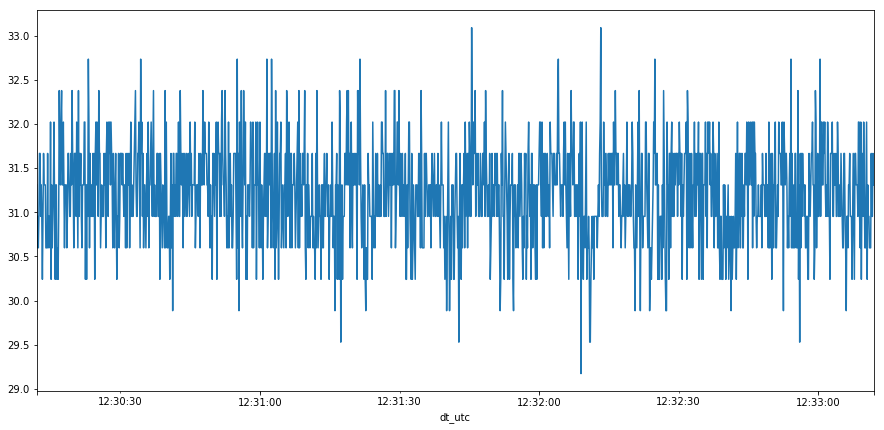

In [15]:
df['pressure'].plot(figsize=(15,7));